<img src="Tut 1.5.jpg" width="900" />

In [116]:
from numpy import log, array, exp, linspace, asarray, argmax, interp
from scipy.integrate import odeint
from scipy.stats import linregress 
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
#The system is in the batch:
K = 0.25 #L/mol.min
Vo = 1 #L
CAo = 5 #mol/L
CBo = 0 #mol/L
CBin = 5 #mol/L
Q = 0.05 #L/min


In [132]:
def sembatch(C,t):
    CA, CB, V= C[0], C[1], C[2]
    dCAdt = -K*CA*CB - Q*CA/V
    dCBdt = K*CA*CB + (Q/V)*(CBin - CB)
    dVdt = Q
    return [dCAdt, dCBdt, dVdt]

tspan = linspace(0, 20, 100)

ans = odeint(sembatch,[CAo,CBo,Vo],tspan) #in the reactor, initial concentration is 0

CA, CB, V = ans.T
rA = -K*CA*CB

In [133]:
#var = asarray([sembatch[y,tspan] for y in ans]) # C is results from odeint
#rA = -K*var[:,0]*var[:,1]
#CA = var[:,0]
#CB = var[:,1]
#V = var[:,2]


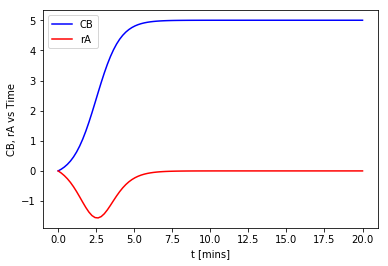

In [134]:
plt.figure(1)
plt.plot(tspan, CB, color='blue', label='CB')
plt.plot(tspan, rA, color='red',label='rA')
plt.legend(loc='best')
plt.ylabel('CB, rA vs Time') 
plt.xlabel('t [mins]') 
plt.show()

In [136]:
i = argmax(rA == min(rA))
rAmax = rA[i]
print('rAmax=',rAmax,'molA/L.min')

rAmax= -1.55981572628 molA/L.min


In [137]:
#t_rAmax = interp(rAmax,rA[::-1],tspan[::-1])
#print ('Time max rA observed: ', t_rAmax, 'mins')

In [138]:
print('Time max rA is observed: ',tspan[i], 'mins')

Time max rA is observed:  2.62626262626 mins
